In [178]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn import datasets
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
import pandas as pd


In [179]:
import matplotlib.pyplot as plt
%matplotlib inline

In [180]:
df=pd.read_csv("https://raw.githubusercontent.com/EpistasisLab/tpot/master/tutorials/MAGIC%20Gamma%20Telescope/MAGIC%20Gamma%20Telescope%20Data.csv")

In [181]:
df.head()

Flength    Fwidth   Fsize   Fconc  Fconc1     Fasym  Fm3long  Fm3trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    Falpha     Fdist Class  
0  40.0920   81.8828     g  
1   6.3609  205.2610     g  
2  76.9600  256.7880     g  
3  10.4490  116.7370     g  
4   4.6480  356.4620     g

In [182]:
df.size,df.shape

(209220, (19020, 11))

In [183]:
df.describe()

Flength        Fwidth         Fsize         Fconc        Fconc1  \
count  19020.000000  19020.000000  19020.000000  19020.000000  19020.000000   
mean      53.250154     22.180966      2.825017      0.380327      0.214657   
std       42.364855     18.346056      0.472599      0.182813      0.110511   
min        4.283500      0.000000      1.941300      0.013100      0.000300   
25%       24.336000     11.863800      2.477100      0.235800      0.128475   
50%       37.147700     17.139900      2.739600      0.354150      0.196500   
75%       70.122175     24.739475      3.101600      0.503700      0.285225   
max      334.177000    256.382000      5.323300      0.893000      0.675200   

              Fasym       Fm3long      Fm3trans        Falpha         Fdist  
count  19020.000000  19020.000000  19020.000000  19020.000000  19020.000000  
mean      -4.331745     10.545545      0.249726     27.645707    193.818026  
std       59.206062     51.000118     20.827439     26.103621     74.731787  
min     -457.916100   -331.780000   -205.894700      0.000000      1.282600  
25%      -20.586550    -12.842775    -10.849375      5.547925    142.492250  
50%        4.013050     15.314100      0.666200     17.679500    191.851450  
75%       24.063700     35.837800     10.946425     45.883550    240.563825  
max      575.240700    238.321000    179.851000     90.000000    495.561000

In [184]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19020 entries, 0 to 19019
Data columns (total 11 columns):
Flength     19020 non-null float64
Fwidth      19020 non-null float64
Fsize       19020 non-null float64
Fconc       19020 non-null float64
Fconc1      19020 non-null float64
Fasym       19020 non-null float64
Fm3long     19020 non-null float64
Fm3trans    19020 non-null float64
Falpha      19020 non-null float64
Fdist       19020 non-null float64
Class       19020 non-null object
dtypes: float64(10), object(1)
memory usage: 1.6+ MB


In [185]:
df.isnull().sum()

Flength     0
Fwidth      0
Fsize       0
Fconc       0
Fconc1      0
Fasym       0
Fm3long     0
Fm3trans    0
Falpha      0
Fdist       0
Class       0
dtype: int64

## EDA

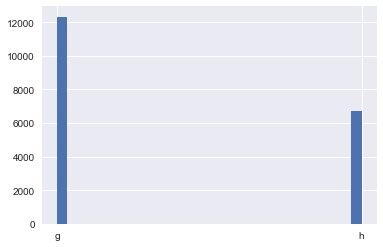

In [186]:
plt.hist(x = 'Class', data = df, bins = 30)
sns.despine()

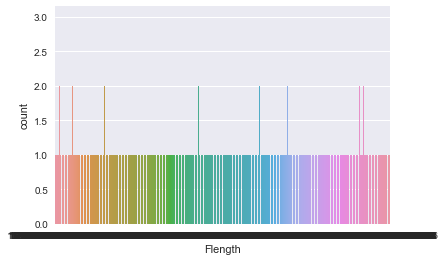

In [187]:
sns.countplot(x = 'Flength', data = df)
sns.despine()

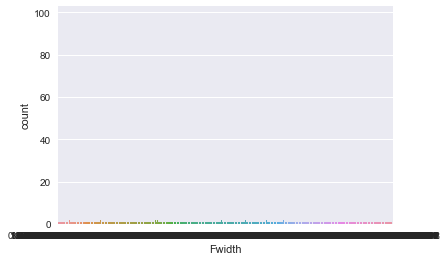

In [188]:

sns.countplot(x = 'Fwidth', data = df)
sns.set(rc={'figure.figsize':(20,10)})

In [189]:
df.Class.replace(['g', 'h'], [1, 0], inplace=True)
df

Flength    Fwidth   Fsize   Fconc  Fconc1     Fasym   Fm3long  \
0       28.7967   16.0021  2.6449  0.3918  0.1982   27.7004   22.0110   
1       31.6036   11.7235  2.5185  0.5303  0.3773   26.2722   23.8238   
2      162.0520  136.0310  4.0612  0.0374  0.0187  116.7410  -64.8580   
3       23.8172    9.5728  2.3385  0.6147  0.3922   27.2107   -6.4633   
4       75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277   28.5525   
5       51.6240   21.1502  2.9085  0.2420  0.1340   50.8761   43.1887   
6       48.2468   17.3565  3.0332  0.2529  0.1515    8.5730   38.0957   
7       26.7897   13.7595  2.5521  0.4236  0.2174   29.6339   20.4560   
8       96.2327   46.5165  4.1540  0.0779  0.0390  110.3550   85.0486   
9       46.7619   15.1993  2.5786  0.3377  0.1913   24.7548   43.8771   
10      62.7766   29.9104  3.3331  0.2475  0.1261  -33.9065   57.5848   
11      18.8562   16.4600  2.4385  0.5282  0.2933   25.1269   -6.5401   
12      45.6321   22.7100  3.0441  0.2213  0.1215  -18.3986  -20.6427   
13      33.1818   12.4655  2.4955  0.4696  0.2412  -17.0341  -22.0762   
14      60.4580   33.1061  3.1944  0.4679  0.2464   14.3000  -33.8765   
15      29.4741   22.4581  2.6258  0.3077  0.1740   18.1242   22.7035   
16      36.1741   17.6865  2.9460  0.2865  0.1591   -4.7746  -18.9697   
17      46.2915   16.0328  2.7756  0.3403  0.1920   49.9706   33.3653   
18      46.0588   18.7870  3.2217  0.2431  0.1504   49.2704   34.1066   
19      44.7394   15.6364  2.6380  0.3107  0.1715   14.0430   37.2246   
20      91.6423   71.8818  3.8484  0.0780  0.0430  -56.7107   72.3016   
21      86.0486   21.8287  3.3587  0.2369  0.1662  -58.7854   57.8212   
22      90.5299   17.8721  3.0330  0.2122  0.1080  -57.4170   84.6189   
23      20.3836    9.0462  2.3365  0.6359  0.3894   22.2700   12.9487   
24      87.2384   27.9350  2.8848  0.3155  0.1806  -18.2102   66.6867   
25     107.3380   29.1356  3.5265  0.1315  0.0683  -47.1175   89.5136   
26      27.2304   19.2817  2.6375  0.3710  0.2039   23.0406   23.3428   
27      26.7065   18.9070  2.6781  0.4281  0.2214    9.1616   18.6858   
28      23.5647    9.9926  2.2095  0.5679  0.3364   30.0056  -13.8665   
29      34.7486   19.2286  2.5629  0.3666  0.1984   30.3637  -16.3092   
...         ...       ...     ...     ...     ...       ...       ...   
18990   26.0277    7.4010  2.4223  0.6194  0.3791  -27.8670   14.0382   
18991   32.1547   12.5410  2.7593  0.4317  0.2167   31.6221   24.5785   
18992  169.0402   35.3614  3.2894  0.3349  0.1986 -162.2329   70.4636   
18993   18.8377    8.8786  2.5617  0.6039  0.3234    0.4589   15.5433   
18994  195.2309   67.0206  3.7669  0.1195  0.0677 -119.1863 -155.8811   
18995   67.7139   28.5831  3.2384  0.2050  0.1106 -133.6450   63.1391   
18996   29.8353   11.3519  2.4449  0.4890  0.2948    9.9236   -9.0429   
18997   18.0124   10.6746  2.5694  0.5768  0.2951  -23.3968   -9.2150   
18998  207.2530   75.8327  4.1476  0.0739  0.0371 -242.4960 -180.0290   
18999  172.2442   20.1926  2.9009  0.2887  0.1940  124.5990  112.9452   
19000   69.3556   31.9822  3.2231  0.3093  0.1744  -52.6569  -42.0622   
19001   57.1905   35.5095  2.7177  0.2337  0.1197  -48.5112  -54.2835   
19002  110.7140   26.8312  3.2212  0.1856  0.1247 -158.0625   73.2259   
19003   21.5189   15.4205  2.7328  0.5587  0.3117   -7.3668    9.2409   
19004   23.4293   11.3673  2.7001  0.3842  0.1890  -26.3784  -14.5363   
19005   23.8277   11.8989  2.4393  0.4655  0.2891   11.1013   11.5776   
19006   32.1454   13.8296  2.4844  0.5182  0.2761  -36.0633  -15.9648   
19007  115.2640   14.0075  2.8540  0.7544  0.4136  -88.2076 -117.4860   
19008  133.4950   40.1631  3.3050  0.1169  0.0602   84.1711  -81.3323   
19009   39.5223   18.6327  2.8341  0.2462  0.1414   24.1819   23.2190   
19010   32.4902   10.6723  2.4742  0.4664  0.2735  -27.0097  -21.1687   
19011   79.5528   44.9929  3.5488  0.1656  0.0900  -39.6213   53.7866   
19012   31.8373   13.8734  2.8251  0.4169  0.1988  -16.4919  -27.1

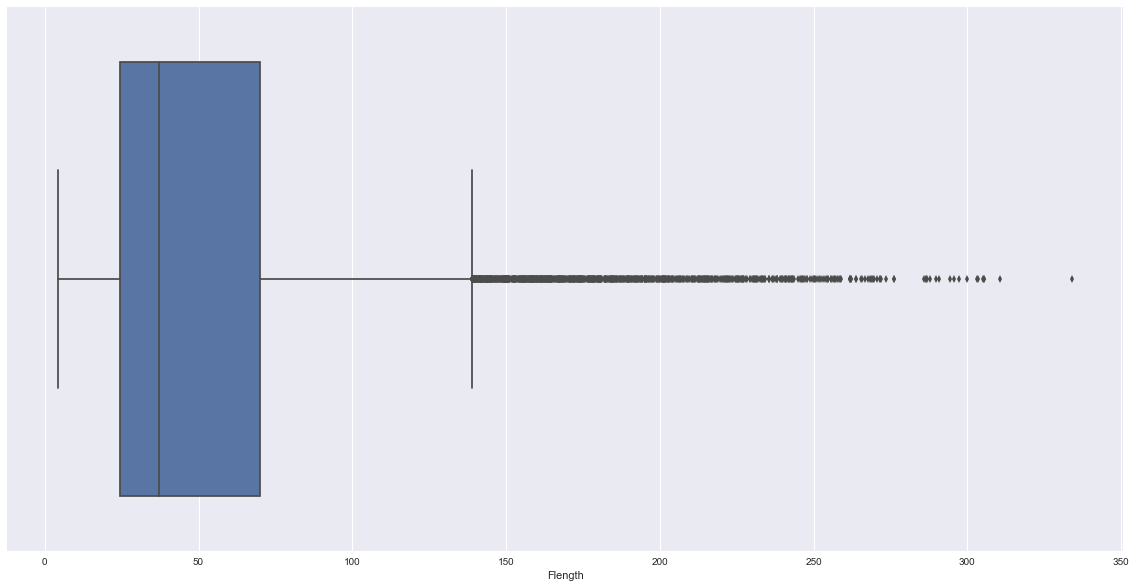

In [190]:
sns.boxplot(x = 'Flength',data = df )
sns.despine()

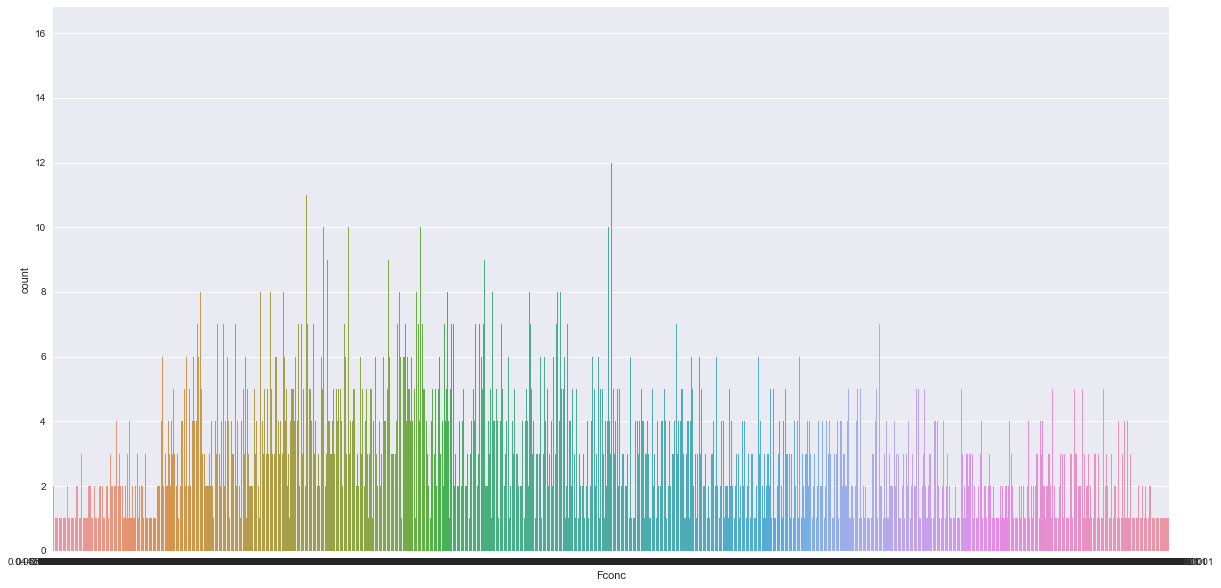

In [191]:
sns.countplot(x = 'Fconc', data = df)
sns.despine()

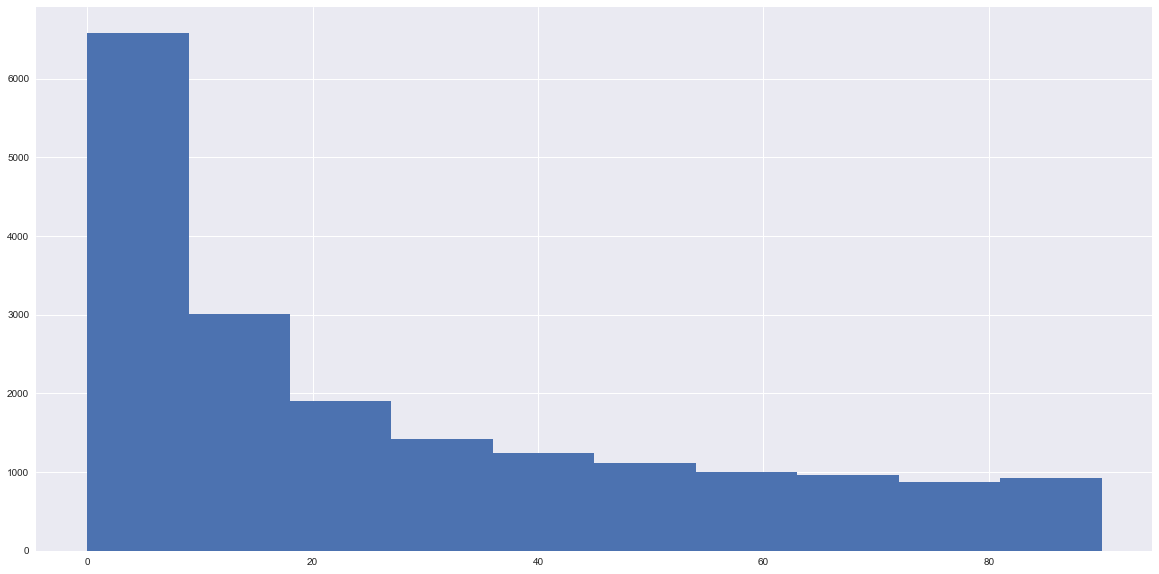

In [192]:
plt.hist(x = 'Falpha',data=df)
sns.despine()

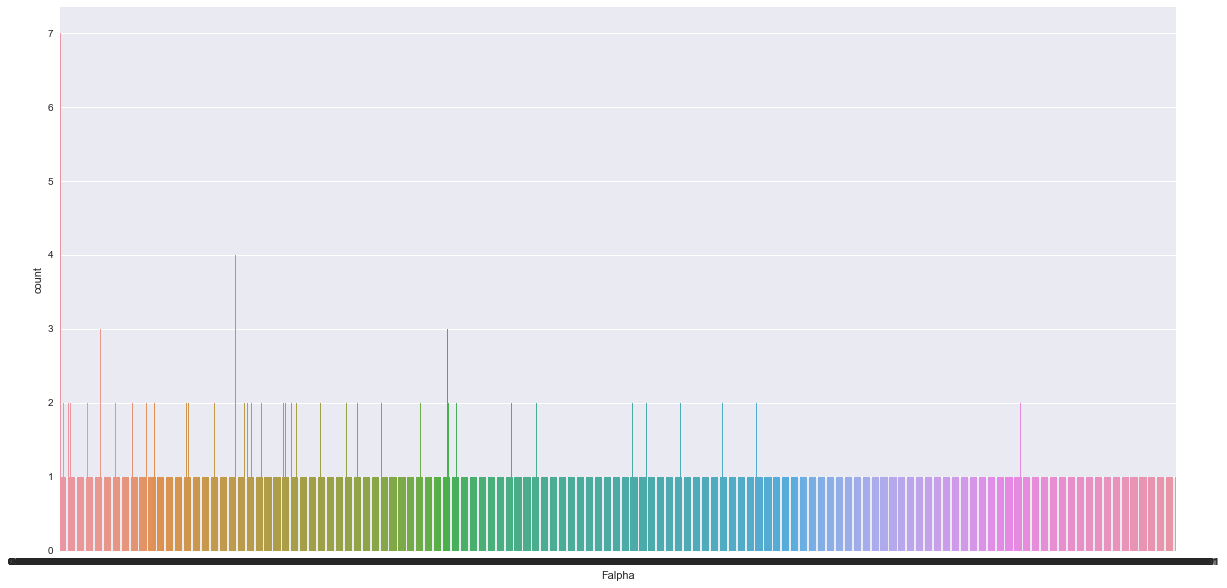

In [193]:
sns.countplot(x = 'Falpha', data = df)
sns.despine()

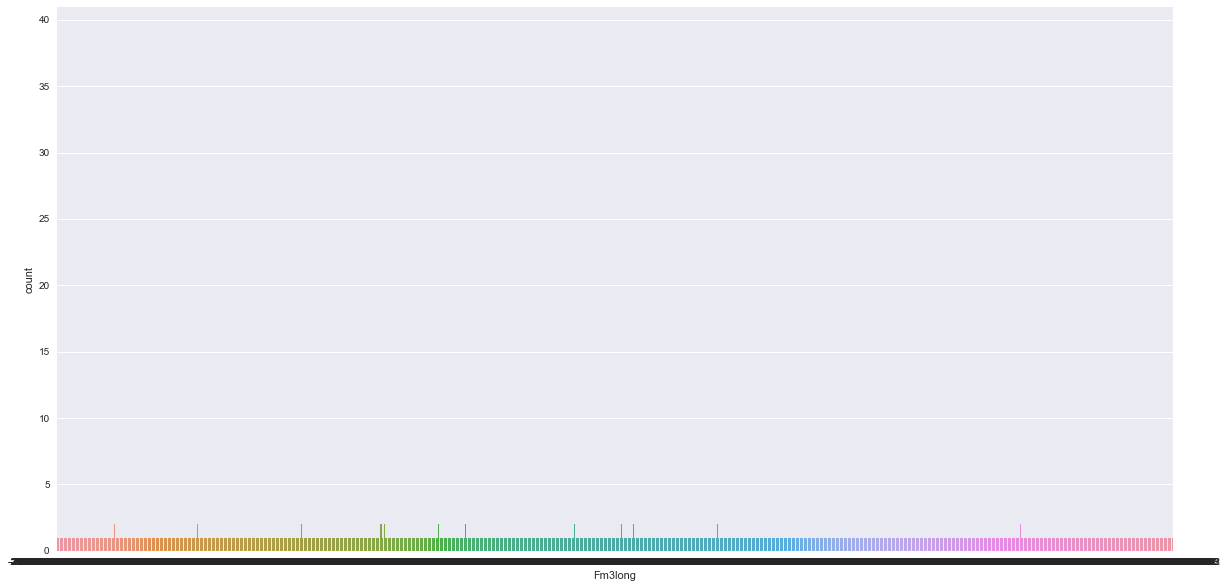

In [194]:
sns.countplot(x = 'Fm3long', data = df)
sns.despine()

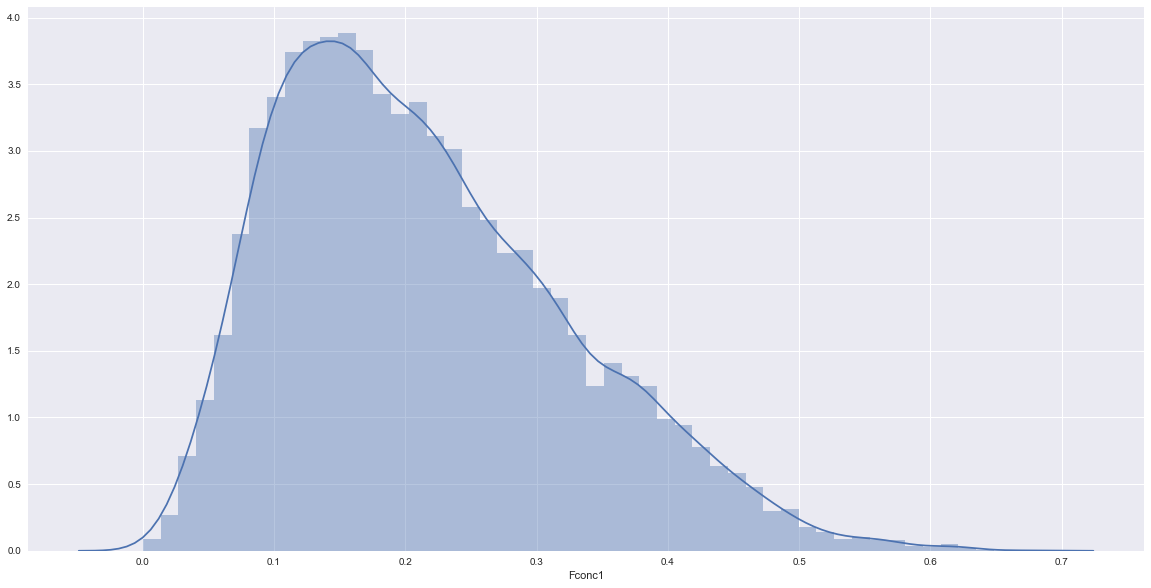

In [195]:
sns.distplot(df['Fconc1'])
sns.despine()



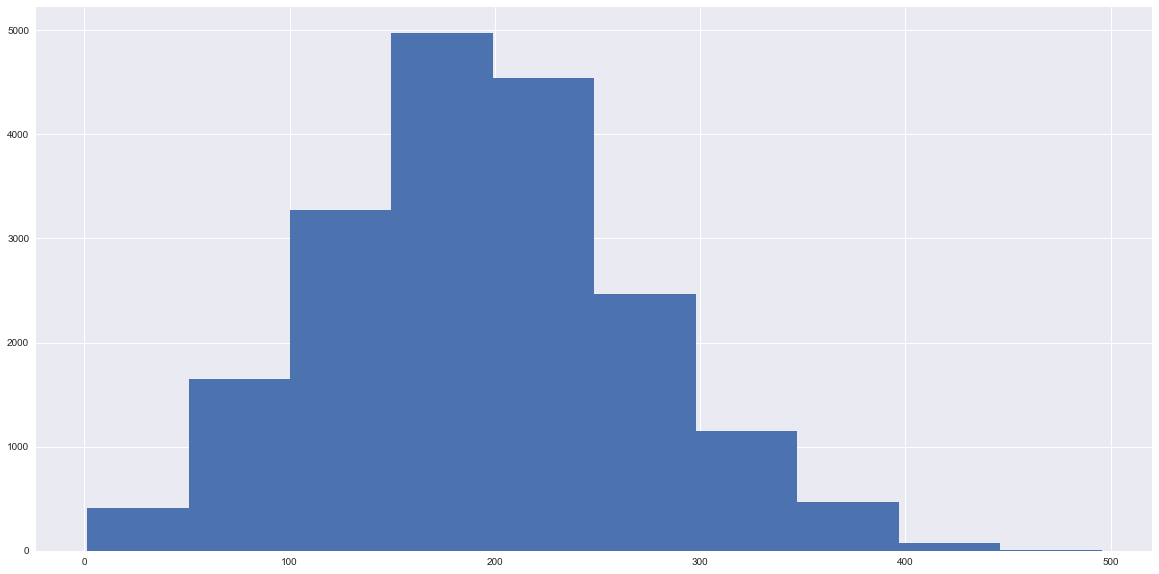

In [196]:
plt.hist(x = 'Fdist', data =df)
sns.despine()

In [197]:
df.corr()

Flength    Fwidth     Fsize     Fconc    Fconc1     Fasym  \
Flength   1.000000  0.770512  0.702454 -0.630999 -0.598145 -0.368556   
Fwidth    0.770512  1.000000  0.717517 -0.609779 -0.581141 -0.266961   
Fsize     0.702454  0.717517  1.000000 -0.850850 -0.808835 -0.159863   
Fconc    -0.630999 -0.609779 -0.850850  1.000000  0.976412  0.112272   
Fconc1   -0.598145 -0.581141 -0.808835  0.976412  1.000000  0.100159   
Fasym    -0.368556 -0.266961 -0.159863  0.112272  0.100159  1.000000   
Fm3long  -0.119747 -0.176234  0.095157 -0.121899 -0.118769  0.274045   
Fm3trans  0.013389  0.039744  0.015455 -0.011294 -0.010966  0.002553   
Falpha   -0.008777  0.066061 -0.186675  0.235272  0.229799 -0.055689   
Fdist     0.418466  0.336816  0.437041 -0.328332 -0.304625 -0.206730   
Class    -0.307572 -0.265596 -0.117795  0.024615  0.004797  0.173587   

           Fm3long  Fm3trans    Falpha     Fdist     Class  
Flength  -0.119747  0.013389 -0.008777  0.418466 -0.307572  
Fwidth   -0.176234  0.039744  0.066061  0.336816 -0.265596  
Fsize     0.095157  0.015455 -0.186675  0.437041 -0.117795  
Fconc    -0.121899 -0.011294  0.235272 -0.328332  0.024615  
Fconc1   -0.118769 -0.010966  0.229799 -0.304625  0.004797  
Fasym     0.274045  0.002553 -0.055689 -0.206730  0.173587  
Fm3long   1.000000 -0.017197 -0.186275  0.037025  0.193409  
Fm3trans -0.017197  1.000000  0.004659  0.011427 -0.003837  
Falpha   -0.186275  0.004659  1.000000 -0.220556 -0.460979  
Fdist     0.037025  0.011427 -0.220556  1.000000 -0.065203  
Class     0.193409 -0.003837 -0.460979 -0.065203  1.000000

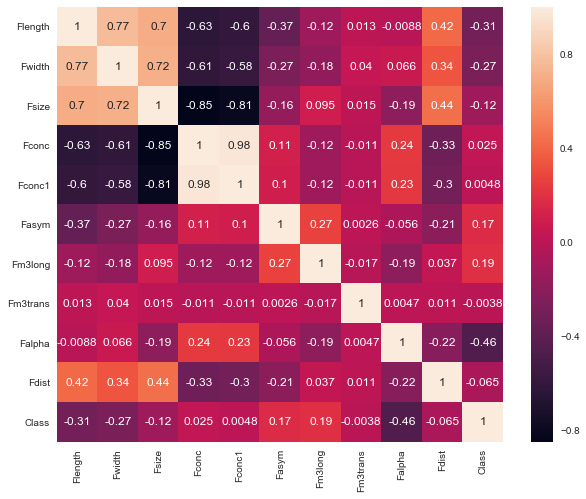

In [198]:
plt.figure(figsize =(10,8))
sns.heatmap(df.corr(),annot=True)
plt.show()

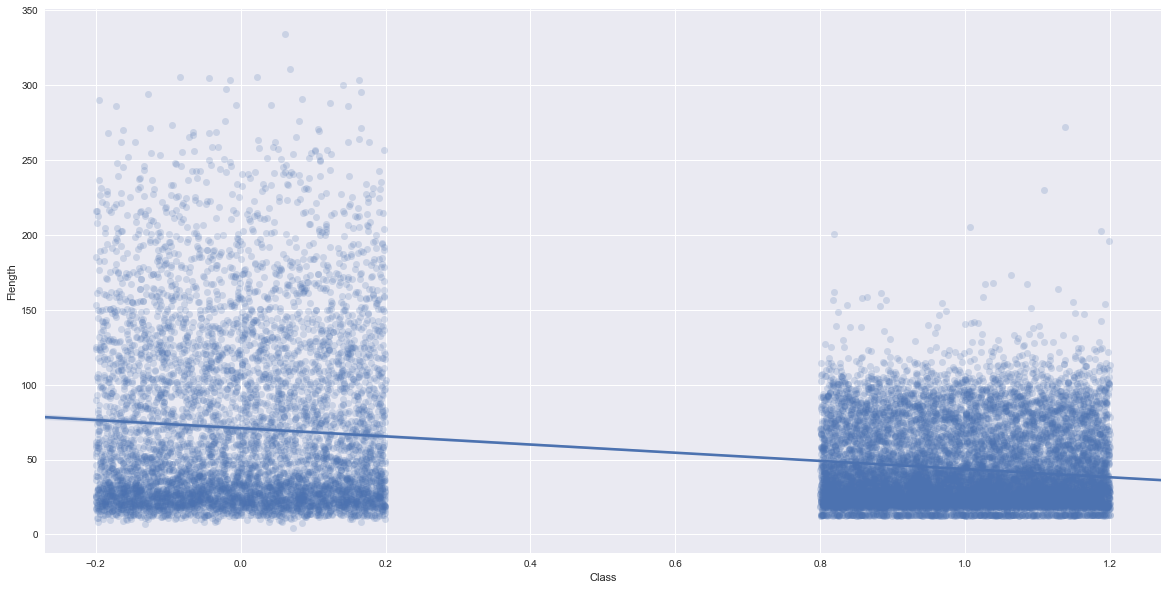

In [199]:
sns.regplot(x = 'Class',y = 'Flength',data = df , x_jitter=0.2, scatter_kws={'alpha':0.2})
sns.despine()

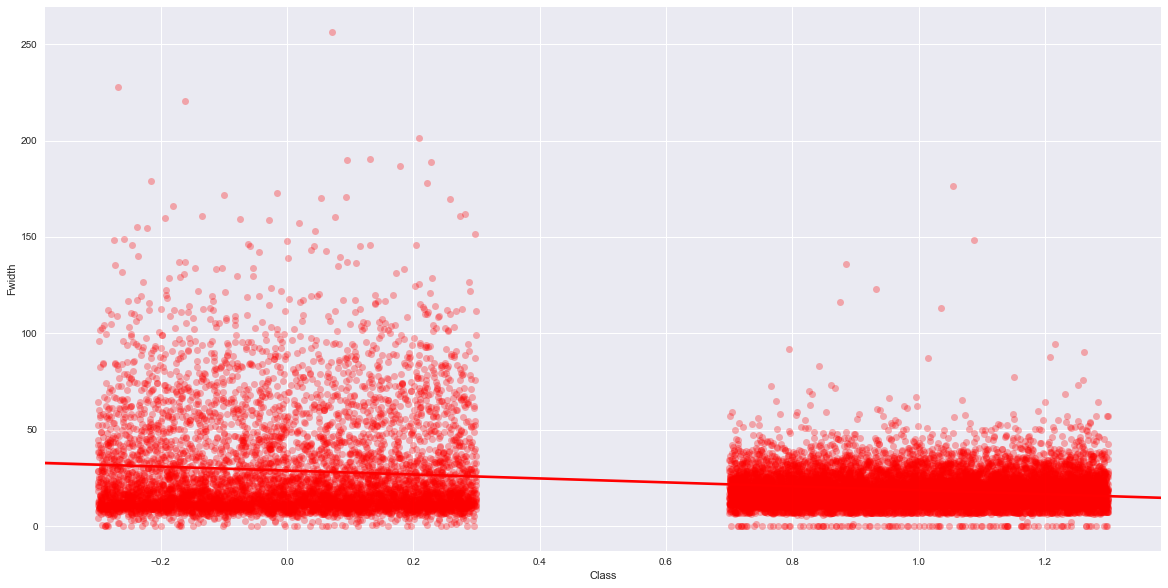

In [200]:
sns.regplot(x = 'Class',y='Fwidth',data = df , x_jitter=0.3, scatter_kws={'alpha':0.3}, color = 'red')
sns.despine()

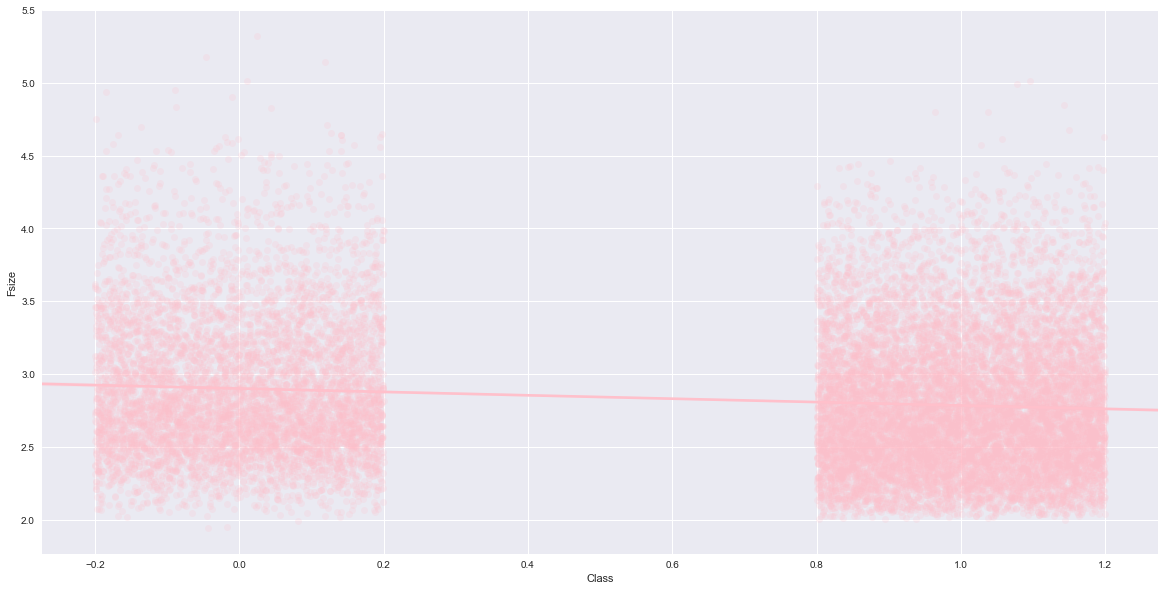

In [201]:
sns.regplot(x = 'Class',y = 'Fsize',data = df , x_jitter=0.2, scatter_kws={'alpha':0.2},color='pink')
sns.despine()

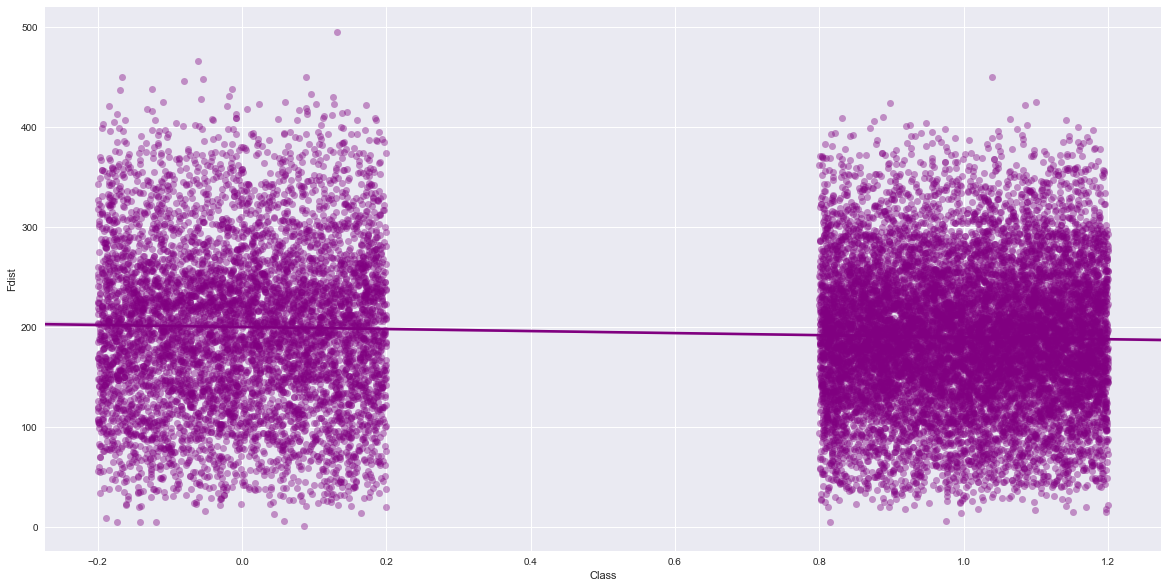

In [202]:
sns.regplot(x = 'Class',y = 'Fdist',data = df , x_jitter=0.2, scatter_kws={'alpha':0.4},color='purple')
sns.despine()



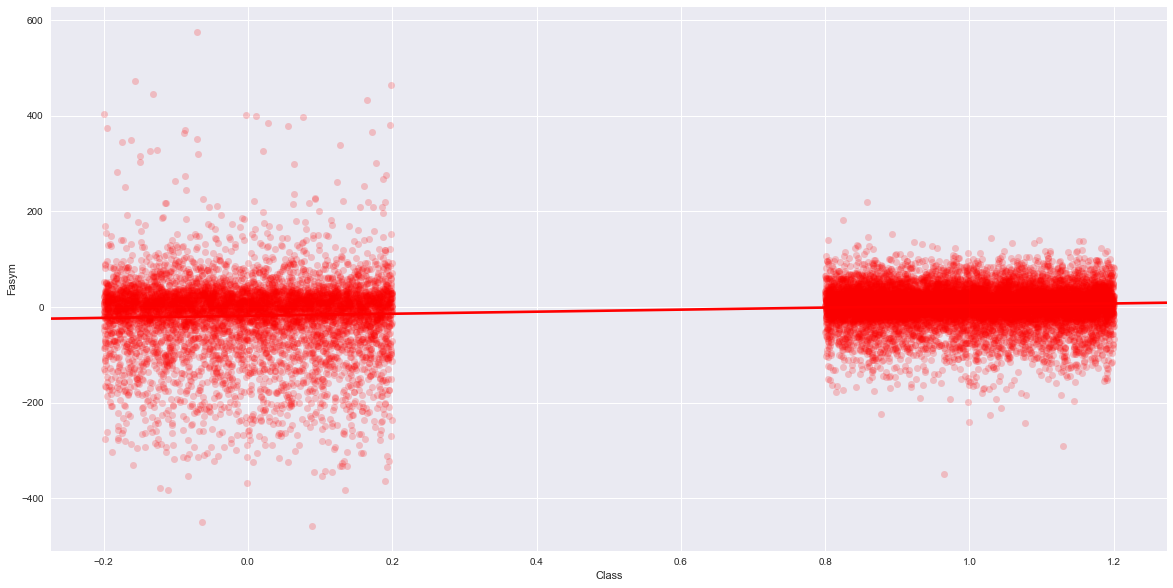

In [203]:
sns.regplot(x = 'Class',y = 'Fasym',data = df , x_jitter=0.2, scatter_kws={'alpha':0.2},color='red')
sns.despine()

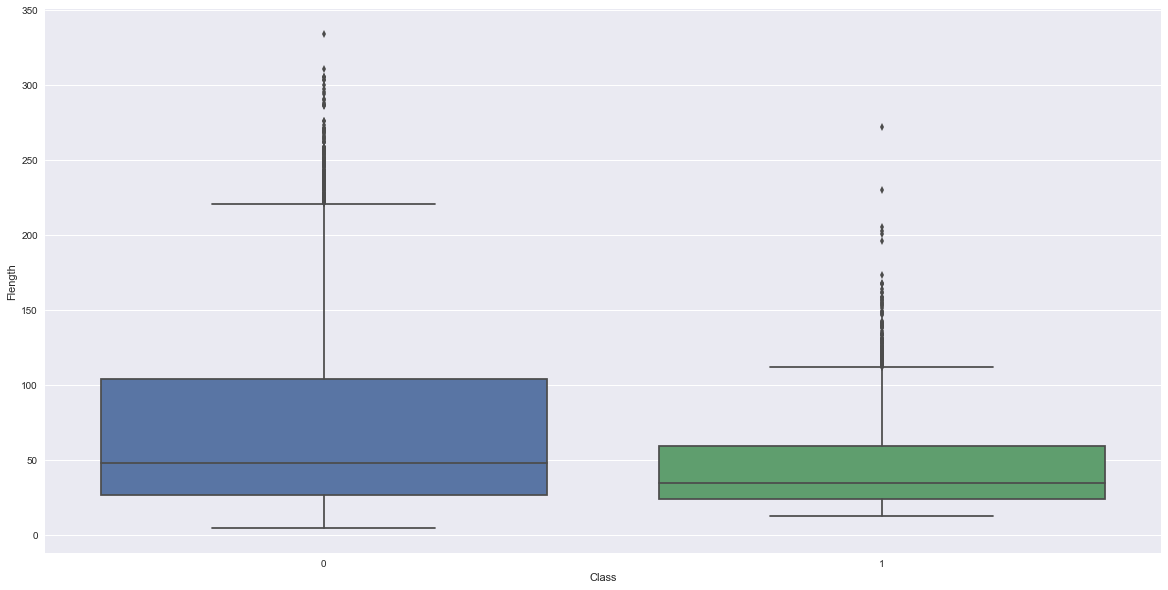

In [204]:
sns.boxplot(x = 'Class',y = 'Flength',data = df )
sns.despine()

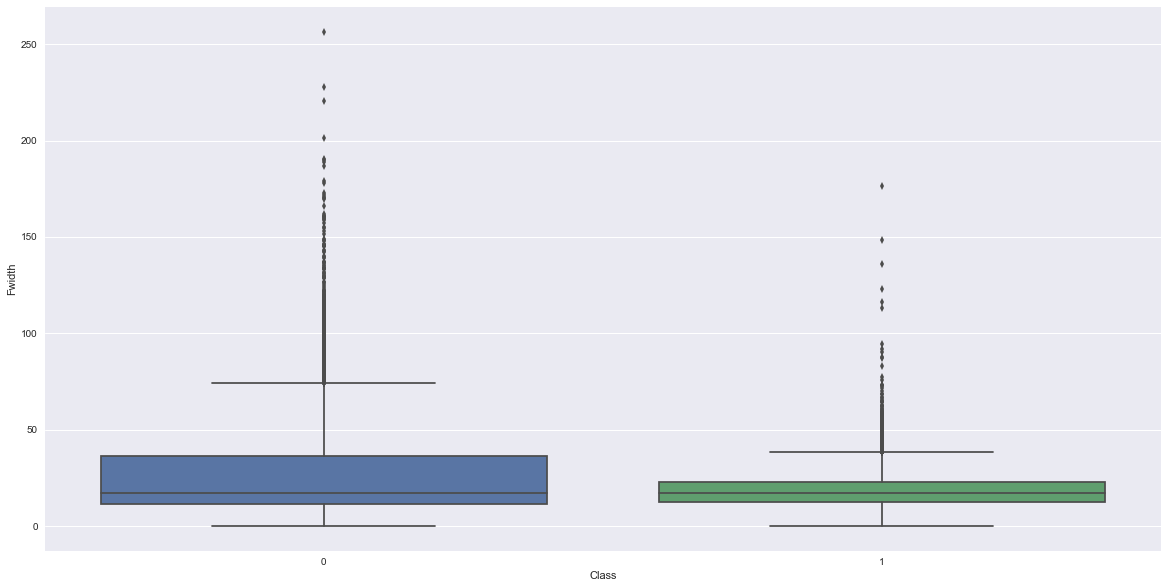

In [205]:
sns.boxplot(x = 'Class',y = 'Fwidth',data = df )
sns.despine()

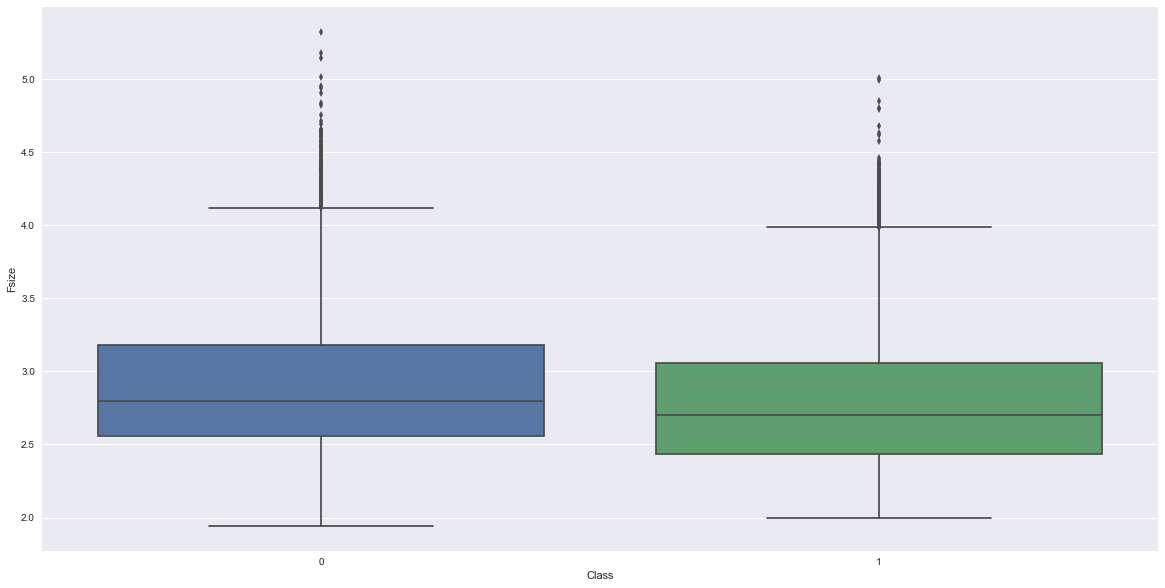

In [206]:
sns.boxplot(x = 'Class',y = 'Fsize',data = df )
sns.despine()

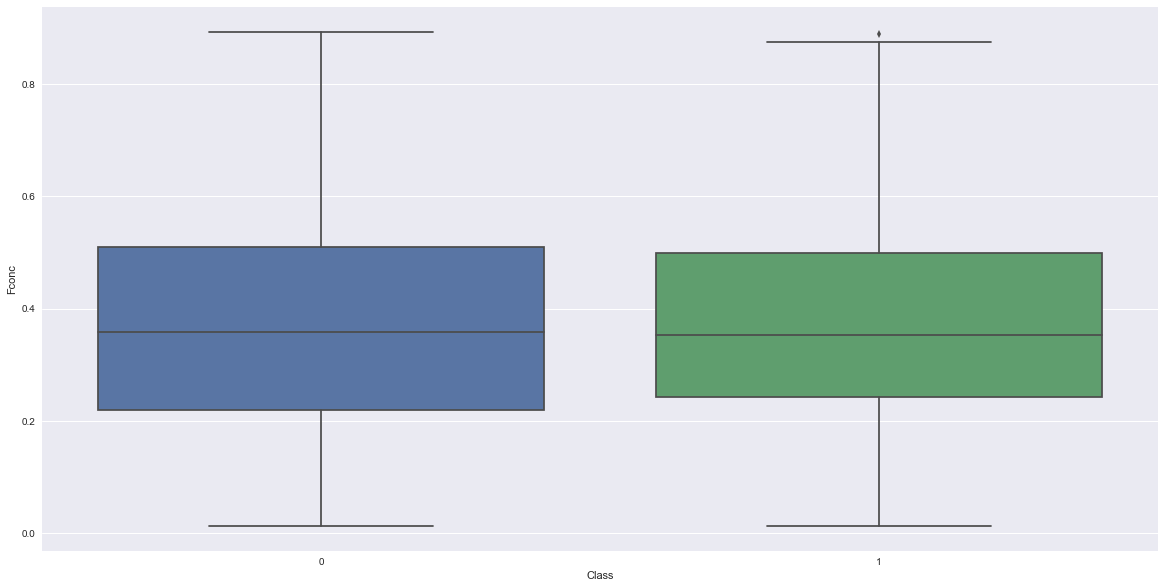

In [207]:
sns.boxplot(x = 'Class',y = 'Fconc',data = df )
sns.despine()

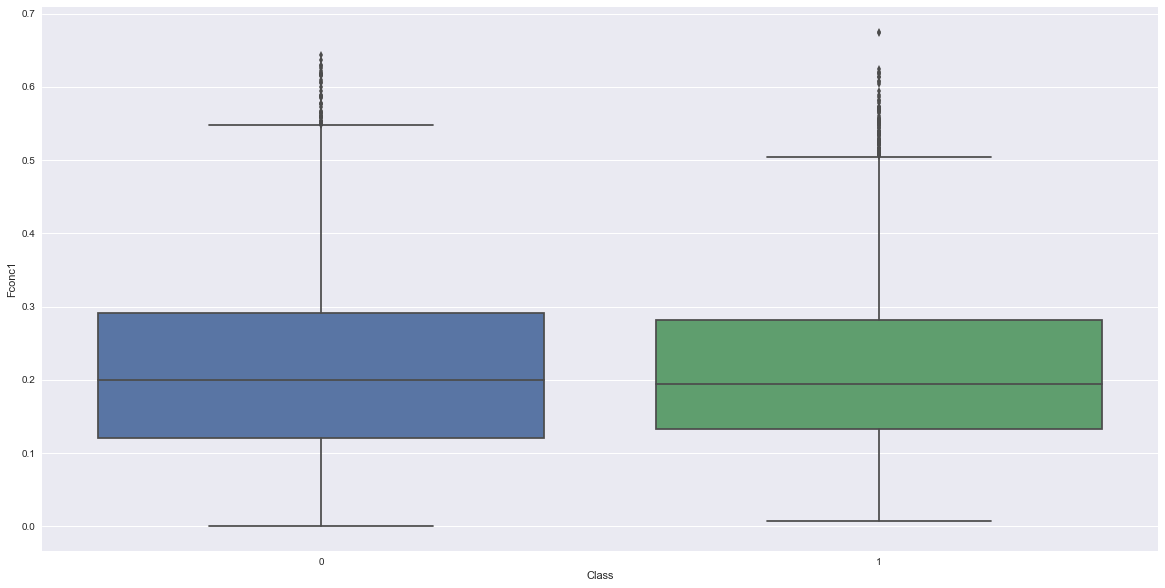

In [208]:
sns.boxplot(x = 'Class',y = 'Fconc1',data = df )
sns.despine()

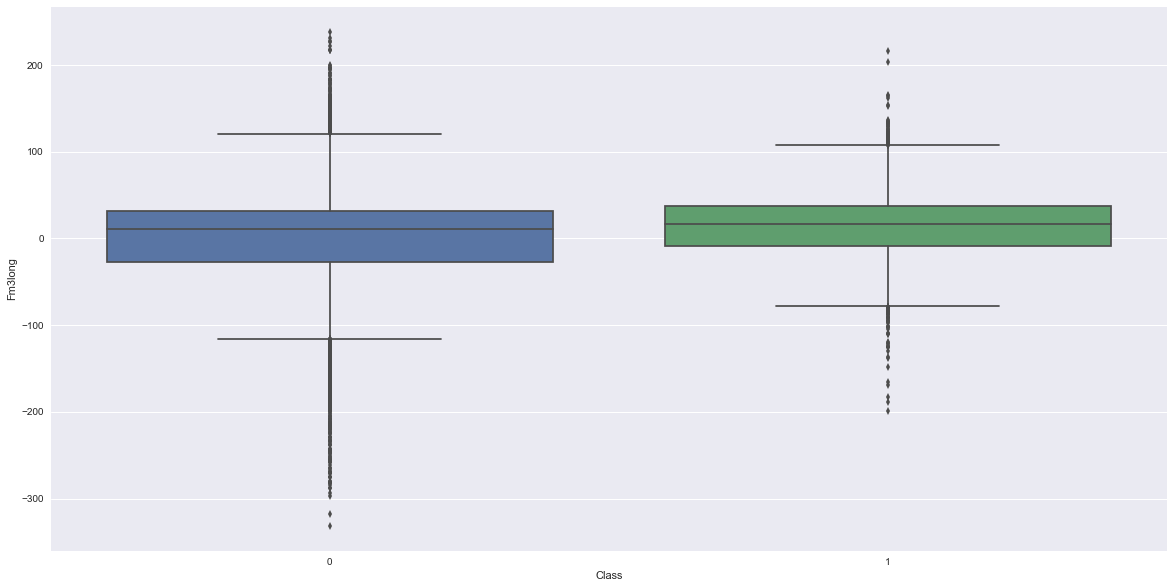

In [209]:
sns.boxplot(x = 'Class',y = 'Fm3long',data = df )
sns.despine()

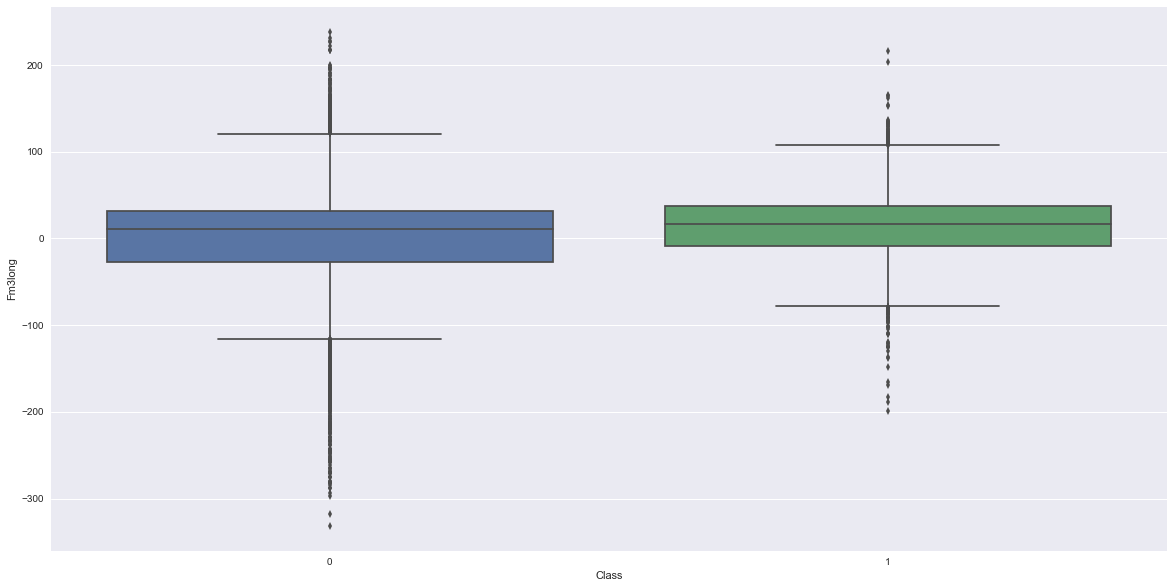

In [210]:
sns.boxplot(x = 'Class',y = 'Fm3long',data = df )
sns.despine()

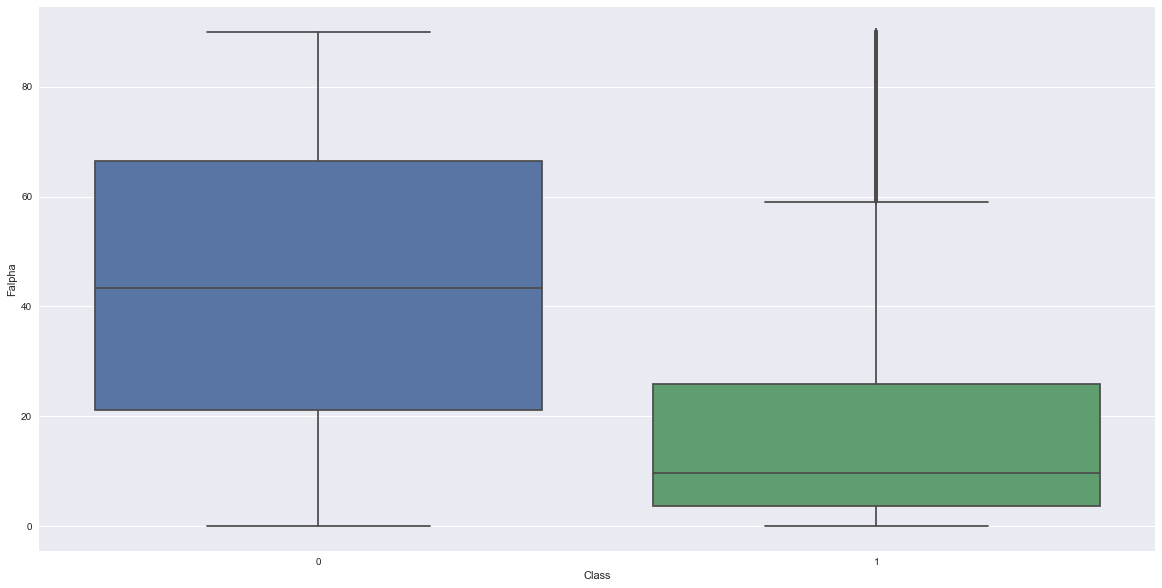

In [211]:
sns.boxplot(x = 'Class',y = 'Falpha',data = df )
sns.despine()

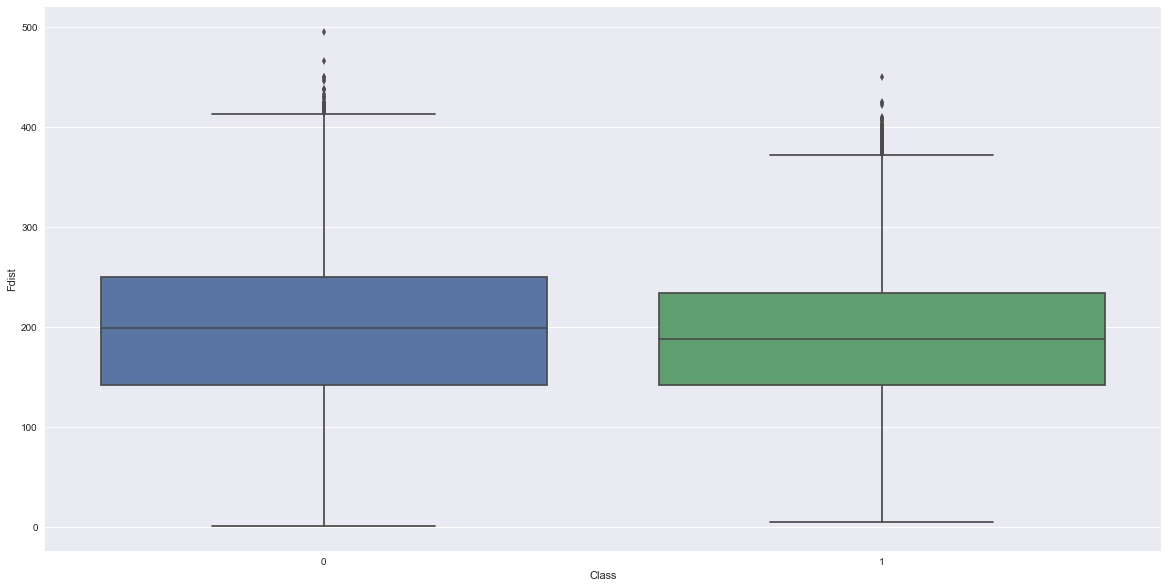

In [212]:
sns.boxplot(x = 'Class',y = 'Fdist',data = df )
sns.despine()

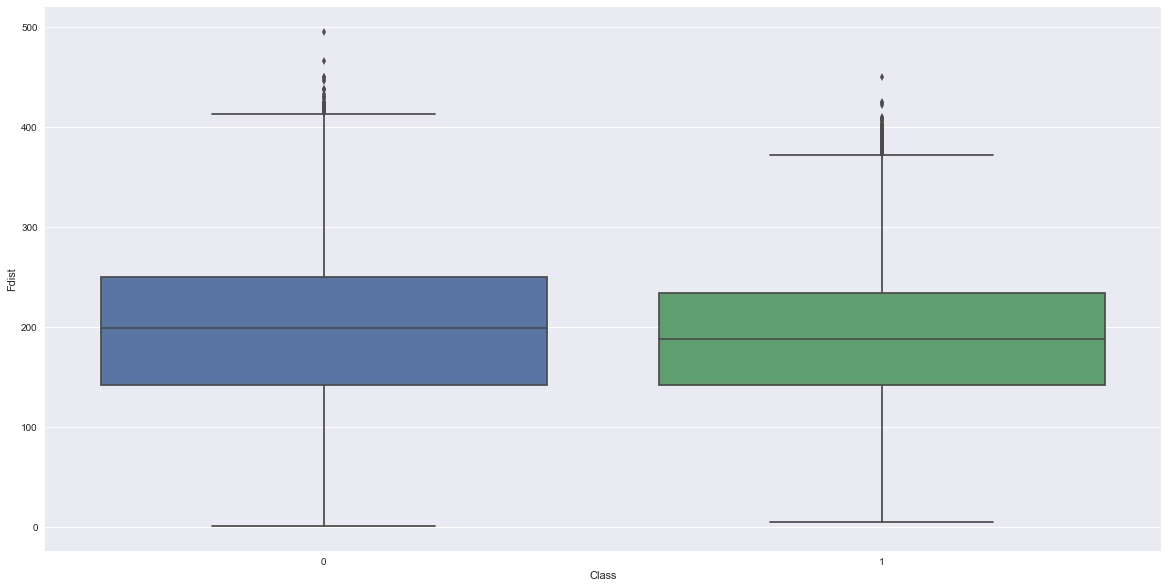

In [213]:
sns.boxplot(x = 'Class',y = 'Fdist',data = df )
sns.despine()

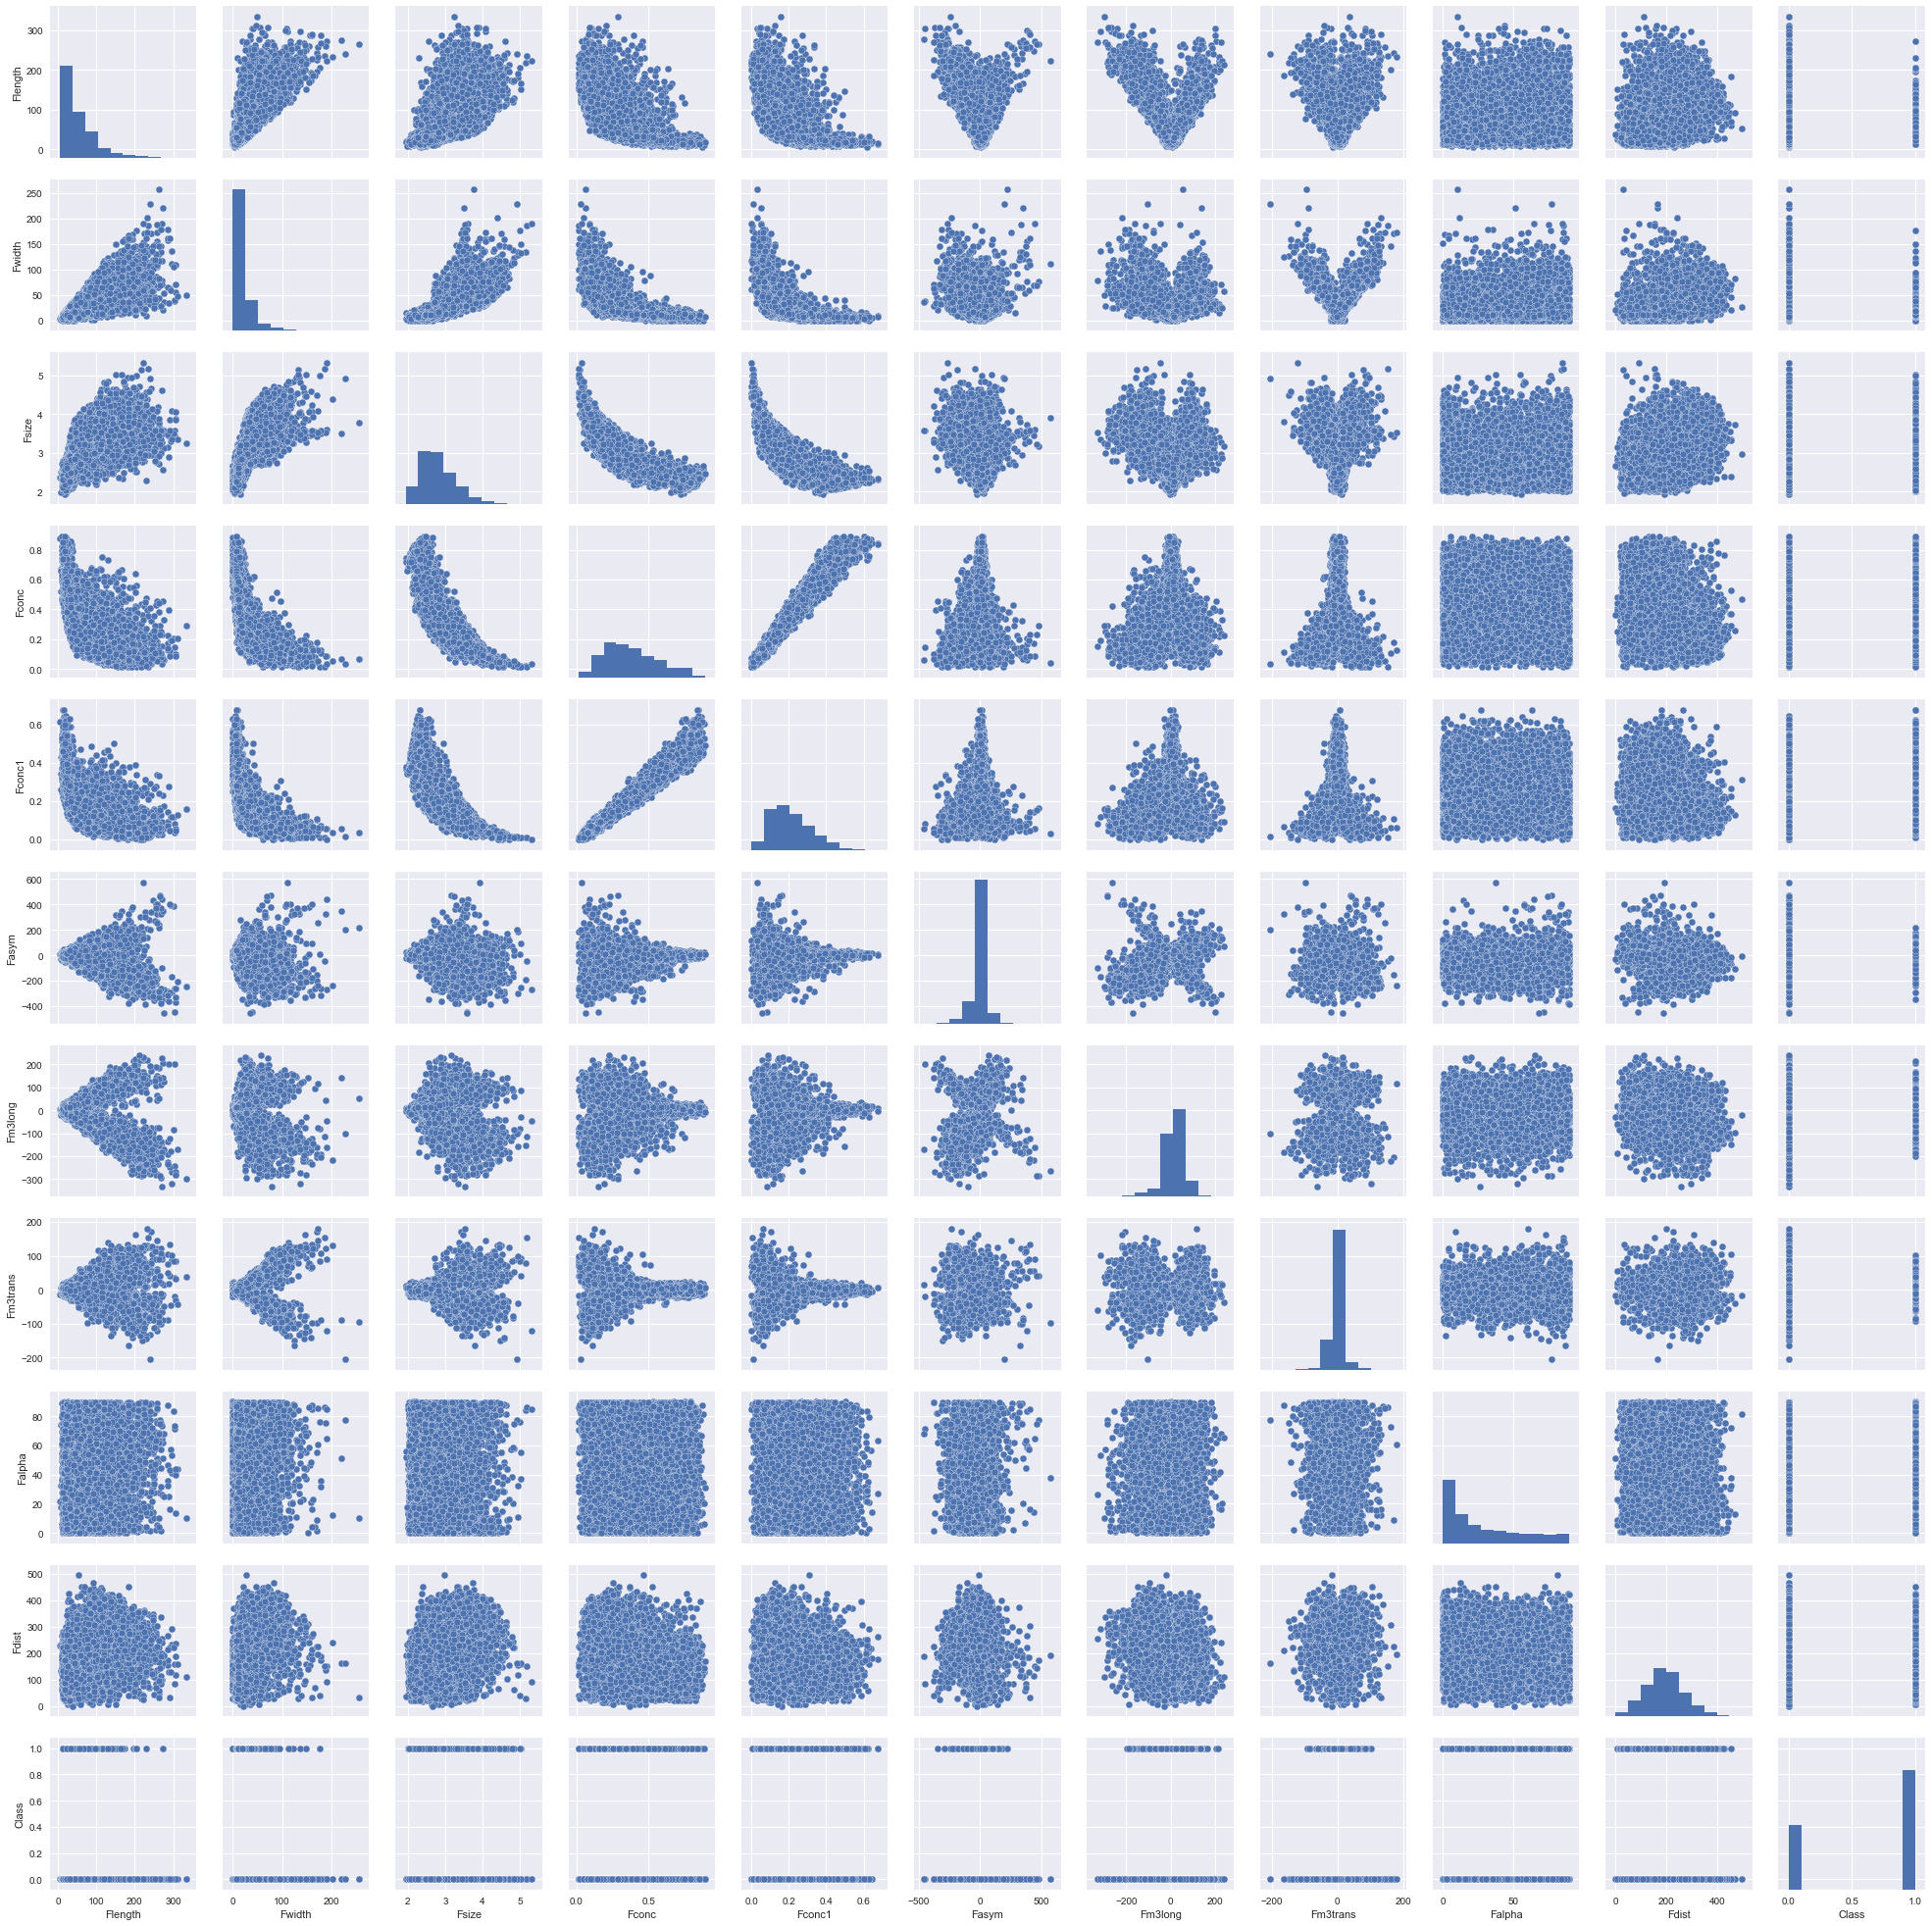

In [214]:
sns.pairplot(df) 
sns.set(rc={'figure.figsize':(10,8)})

In [215]:
y=df['Class']
del df['Class']
x = np.matrix(df)
x

matrix([[ 28.7967,  16.0021,   2.6449, ...,  -8.2027,  40.092 ,  81.8828],
        [ 31.6036,  11.7235,   2.5185, ...,  -9.9574,   6.3609, 205.261 ],
        [162.052 , 136.031 ,   4.0612, ..., -45.216 ,  76.96  , 256.788 ],
        ...,
        [ 75.4455,  47.5305,   3.4483, ...,  -9.4662,  30.2987, 256.5166],
        [120.5135,  76.9018,   3.9939, ..., -63.8389,  84.6874, 408.3166],
        [187.1814,  53.0014,   3.2093, ...,  31.4755,  52.731 , 272.3174]])

In [216]:
x.shape

(19020, 10)

## NORMALIZATION

In [217]:
from sklearn import preprocessing
z = preprocessing.normalize(x)
z

array([[ 0.27807979,  0.15452676,  0.02554089, ..., -0.07921064,
         0.38715461,  0.79071394],
       [ 0.14952593,  0.05546733,  0.01191576, ..., -0.04711139,
         0.03009529,  0.97115015],
       [ 0.43858075,  0.368157  ,  0.01099131, ..., -0.12237348,
         0.20828607,  0.69497614],
       ...,
       [ 0.27269427,  0.17179679,  0.01246372, ..., -0.03421514,
         0.10951325,  0.92716737],
       [ 0.26475086,  0.16894221,  0.00877402, ..., -0.1402449 ,
         0.18604606,  0.89701295],
       [ 0.45113082,  0.12774007,  0.00773482, ...,  0.07585993,
         0.12708837,  0.65631934]])

In [218]:
z1 = preprocessing.scale(z)
z1

array([[ 0.4371969 ,  0.96105233,  1.96583323, ..., -1.00237057,
         1.40809579, -0.63399955],
       [-0.70084774, -0.79102139, -0.44683169, ..., -0.60036189,
        -0.73527016,  0.68589514],
       [ 1.85805849,  4.73955103, -0.61052875, ..., -1.54293871,
         0.3343786 , -1.33432358],
       ...,
       [ 0.3895206 ,  1.26650907, -0.34980244, ..., -0.43885027,
        -0.25853775,  0.36416014],
       [ 0.31920025,  1.21601989, -1.00315433, ..., -1.766759  ,
         0.20087561,  0.14357991],
       [ 1.96916012,  0.48727362, -1.18717152, ...,  0.93972172,
        -0.15303729, -1.6170989 ]])

In [219]:

z1.shape

(19020, 10)

## FEATURE ENGINEERING

In [220]:
from sklearn.feature_selection import VarianceThreshold
df_num=z1
selector = VarianceThreshold()
selector.fit_transform(df_num)

array([[ 0.4371969 ,  0.96105233,  1.96583323, ..., -1.00237057,
         1.40809579, -0.63399955],
       [-0.70084774, -0.79102139, -0.44683169, ..., -0.60036189,
        -0.73527016,  0.68589514],
       [ 1.85805849,  4.73955103, -0.61052875, ..., -1.54293871,
         0.3343786 , -1.33432358],
       ...,
       [ 0.3895206 ,  1.26650907, -0.34980244, ..., -0.43885027,
        -0.25853775,  0.36416014],
       [ 0.31920025,  1.21601989, -1.00315433, ..., -1.766759  ,
         0.20087561,  0.14357991],
       [ 1.96916012,  0.48727362, -1.18717152, ...,  0.93972172,
        -0.15303729, -1.6170989 ]])

## IMPLEMENTING CLASSIFIER MODELS AND ALSO COMPARING DIFFERENT CLASSIFIERS USING AUC MEASURE¶ 

In [221]:
model=GradientBoostingClassifier(n_estimators=30,random_state=7,verbose=1)
model

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=30,
              presort='auto', random_state=7, subsample=1.0, verbose=1,
              warm_start=False)

In [222]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3)
x_train.shape,y_train.shape

((13314, 10), (13314,))

In [223]:
model.fit(x_train,y_train)

      Iter       Train Loss   Remaining Time 
         1           1.2248            1.06s
         2           1.1669            0.97s
         3           1.1191            0.93s
         4           1.0784            0.88s
         5           1.0438            0.84s
         6           1.0128            0.79s
         7           0.9858            0.75s
         8           0.9613            0.68s
         9           0.9406            0.67s
        10           0.9213            0.63s
        20           0.8000            0.30s
        30           0.7361            0.00s


GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=30,
              presort='auto', random_state=7, subsample=1.0, verbose=1,
              warm_start=False)

In [224]:
filename='Gradient.sav'
import pickle
pickle.dump(model, open(filename, 'wb'))
loaded_model = pickle.load(open(filename, 'rb'))
pred=model.predict(x_test)
pred

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [225]:
Gradient=metrics.accuracy_score(pred,y_test)
Gradient

0.8527865404837014

In [226]:

print(confusion_matrix(y_test,pred))

[[1334  659]
 [ 181 3532]]


In [227]:
print(classification_report(y_test,pred))

             precision    recall  f1-score   support

          0       0.88      0.67      0.76      1993
          1       0.84      0.95      0.89      3713

avg / total       0.86      0.85      0.85      5706



In [228]:
model1=BaggingClassifier(n_estimators=30,random_state=7,verbose=1)
model1

BaggingClassifier(base_estimator=None, bootstrap=True,
         bootstrap_features=False, max_features=1.0, max_samples=1.0,
         n_estimators=30, n_jobs=1, oob_score=False, random_state=7,
         verbose=1, warm_start=False)

In [229]:
model1.fit(x_train,y_train)

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.1s finished


BaggingClassifier(base_estimator=None, bootstrap=True,
         bootstrap_features=False, max_features=1.0, max_samples=1.0,
         n_estimators=30, n_jobs=1, oob_score=False, random_state=7,
         verbose=1, warm_start=False)

In [230]:
pred1=model1.predict(x_test)
pred1

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


array([1, 0, 1, ..., 1, 1, 1], dtype=int64)

In [231]:
filename='Bagging.sav'
pickle.dump(model1, open(filename, 'wb'))
loaded_model = pickle.load(open(filename, 'rb'))


In [232]:
print(classification_report(y_test,pred1))

             precision    recall  f1-score   support

          0       0.85      0.76      0.80      1993
          1       0.88      0.93      0.90      3713

avg / total       0.87      0.87      0.87      5706



In [233]:
print(confusion_matrix(y_test,pred1))


[[1519  474]
 [ 268 3445]]


In [234]:
Bagging=metrics.accuracy_score(pred1,y_test)
Bagging

0.8699614440939362

In [235]:
model2=RandomForestClassifier(criterion='entropy',n_estimators=30,random_state=7,verbose=1)
model2.fit(x_train,y_train)

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    3.6s finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=1,
            oob_score=False, random_state=7, verbose=1, warm_start=False)

In [236]:
filename='Random.sav'
pickle.dump(model2, open(filename, 'wb'))
loaded_model = pickle.load(open(filename, 'rb'))
pred2=model2.predict(x_test)
pred2


[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.0s finished


array([1, 0, 1, ..., 1, 1, 1], dtype=int64)

In [237]:
Random=metrics.accuracy_score(pred2,y_test)
Random

0.8729407641079565

In [238]:
print(confusion_matrix(y_test,pred2))

[[1507  486]
 [ 239 3474]]


In [239]:
print(classification_report(y_test,pred2))

             precision    recall  f1-score   support

          0       0.86      0.76      0.81      1993
          1       0.88      0.94      0.91      3713

avg / total       0.87      0.87      0.87      5706



In [240]:
list=[]
model4=LogisticRegression()
list.append(('logistics',model4))
model5=SVC()
list.append(('svm',model5))
model6=DecisionTreeClassifier()
list.append(('Decision',model6))
model7 = VotingClassifier(list).fit(x_train,y_train)
filename='Voting.sav'
pickle.dump(model7, open(filename, 'wb'))
loaded_model = pickle.load(open(filename, 'rb'))
pred3=model7.predict(x_test)
pred3

C:\Users\deepanshu\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [241]:
voting=metrics.accuracy_score(pred3,y_test)
voting

0.8114265685243603

In [242]:

print(classification_report(y_test,pred3))

             precision    recall  f1-score   support

          0       0.89      0.53      0.66      1993
          1       0.79      0.96      0.87      3713

avg / total       0.83      0.81      0.80      5706



In [243]:
print(confusion_matrix(y_test,pred3))

[[1048  945]
 [ 131 3582]]


In [244]:
from sklearn.metrics import auc
g=metrics.roc_auc_score(pred,y_test)
g

0.8616431721912349

In [245]:
b=metrics.roc_auc_score(pred1,y_test)
b

0.8645393790571324

In [246]:
r=metrics.roc_auc_score(pred2,y_test)
r

0.8701942101426638

In [247]:
v=metrics.roc_auc_score(pred3,y_test)
v

0.8400706869891761

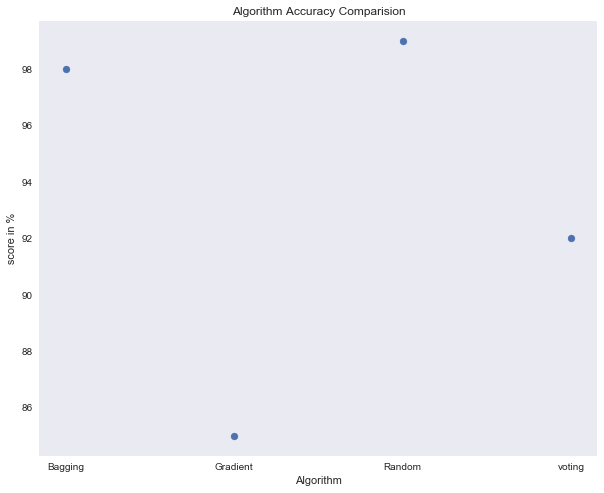

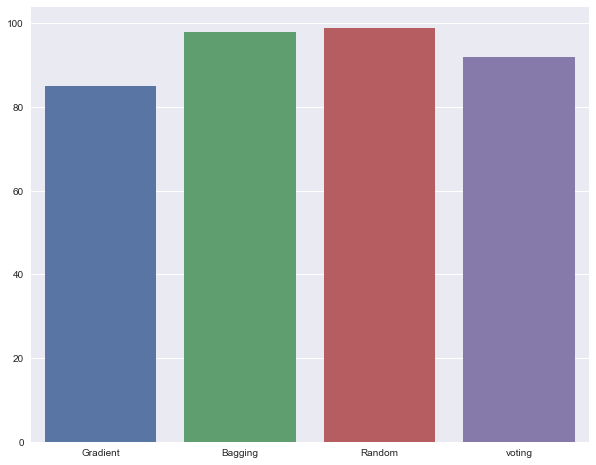

In [248]:
a=['Gradient','Bagging','Random','voting']
b=[85,98,99,92]
plt.scatter(x=a,y=b)
plt.grid()
plt.title('Algorithm Accuracy Comparision')
plt.xlabel('Algorithm')
plt.ylabel('score in %')
plt.show()
sns.barplot(x=a,y=b)



In [249]:
reg_lr = LogisticRegression(random_state=5)
reg_lr.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=5, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [250]:
pred_lr=reg_lr.predict(x_test)
from sklearn import metrics
lr_acc=metrics.accuracy_score(pred_lr,y_test)
lr_acc

0.7868909919383106

In [251]:
logistic=metrics.roc_auc_score(pred_lr,y_test)
logistic

0.7740354282941034

In [252]:
from sklearn.neighbors import KNeighborsClassifier
model_KNN = KNeighborsClassifier(n_neighbors=15)
model_KNN.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=15, p=2,
           weights='uniform')

In [253]:
pred_KNN = model_KNN.predict(x_test)
knn=metrics.roc_auc_score(pred_KNN,y_test)
knn

0.8295995040524948

In [254]:
pred_KNN = model_KNN.predict(x_test)
knn=metrics.roc_auc_score(pred_KNN,y_test)
knn

0.8295995040524948

In [255]:
from sklearn.naive_bayes import GaussianNB
model_gnb=GaussianNB()
model_gnb.fit(x_train,y_train)

GaussianNB(priors=None)

In [256]:
pred_gnb = model_gnb.predict(x_test)
gnb_acc = metrics.accuracy_score(y_test,pred_gnb)
gnb_acc

0.7222222222222222

In [264]:

nb=metrics.roc_auc_score(pred_gnb,y_test)
nb

0.7089513858813339

In [265]:
from sklearn.svm import SVC
model_svc=SVC()
model_svc.fit(x_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [266]:
pred_svc = model_svc.predict(x_test)
svc_acc = metrics.accuracy_score(y_test,pred_svc)
svc_acc

0.6586049772169646

In [267]:
svc=metrics.roc_auc_score(pred_svc,y_test)
svc

0.7903200504657737

## AUC MEASURE
## LOGISTIC REGRESSION=0.7785526942411563
## KNN=0.8301454146667996
## GaussianNB=0.7253998446054725 
## SVM=0.8075282885431401
## Accuracy reports of classifiers

## Gradient = 0.8429723098492815
## Bagging = 0.8715387311601822
## Random = 0.8724150017525412
## Voting = 0.7944269190325972


# According to AUC Measure Random Forest Classifier show the best score them others.
